In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [3]:
# Loading data into python environment
data=pd.read_csv('titanic_dataset (2).csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>EDA</b>

In [4]:
# Shape of the data
data.shape

(891, 12)

In [5]:
# Summary of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Basic details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Columns having object data types
df=(data.select_dtypes(include=object)).columns
df

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
# Unique values in the data
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# Checking Missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# There are missing values in the columns 'Age','Cabin' and 'Embarked'

In [10]:
# Percentage of missing values in the data
df=pd.DataFrame(data.isna().sum()/len(data))*100
df

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


<AxesSubplot:>

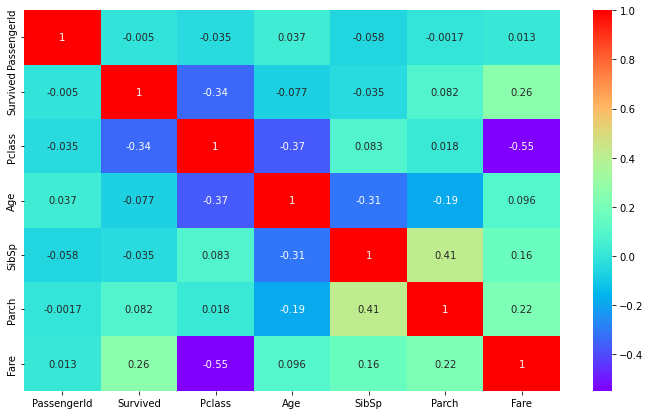

In [11]:
#  Visualization....Correlation Matrix
corr_matrix=data.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(corr_matrix,annot=True,cmap='rainbow')

In [ ]:
# We can see that 'Fare' has a negative correlation with 'Pclass' . 'Parch','SibSp' and 'Pclass' have a negative correlation
# with 'Age'.'PassengerId','Pclass','Age' and 'SibSp' have a negative correlation with 'Survived'.But 'Parch' and 'Fare' have
# a positive correlation with 'Survived'.

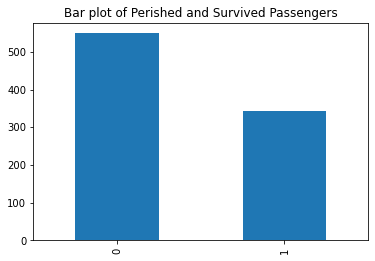

In [12]:
# Bar plot of the passengers who 'Survived' and those who 'died'
(data['Survived'].value_counts().plot(kind='bar'))
plt.title('Bar plot of Perished and Survived Passengers')
plt.show()

# Preprocessing

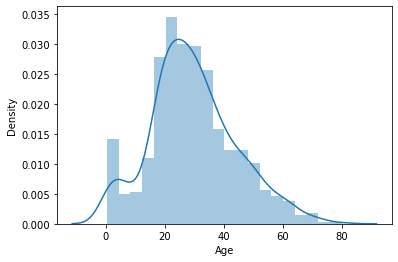

In [13]:
# Distribution plot of data['Age']
sns.distplot(data['Age'])
plt.show()

In [14]:
# Filling the missing values in data['Age'] with median since the distribution is right skewed
data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
# Finding count of unique values in data['Embarked']
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Filling the missing values in data['Embarked'] with mode()[0]
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

Dropping the columns 'PassengerId','Name','Ticket' and also 'Cabin' which has 77% missing values

In [17]:
data1=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

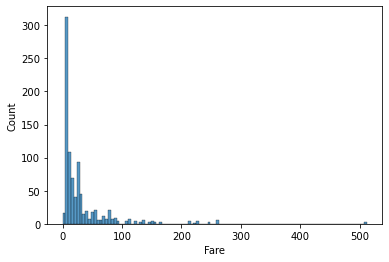

In [18]:
# Histplot of data['Fare']
sns.histplot(data['Fare'])
plt.show()

In [19]:
data1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# The columns 'Sex' and 'Embarked' are categorical. So we have to convert them into numerical

In [21]:
# Label Encoding data1['Sex']
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data1['Sex']=lab_enc.fit_transform(data1['Sex'])

In [22]:
# One Hot Encoding data1['Embarked']
data1=pd.get_dummies(data1)

In [23]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [24]:
# Finding count of unique values in data1['Survived']
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
# Checking the data types in 'data1'
data1.dtypes

Survived        int64
Pclass          int64
Sex             int32
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [26]:
# Splitting data1 into Features and Target  (X and y)....  The column 'Survived' is the target variable
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 3. Create kNN and SVM models

In [ ]:
# Model

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

# Creating kNN Classification Model

In [30]:
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Importing accuracy score
from sklearn.metrics import accuracy_score

In [32]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

In [33]:
y_pred_kNN

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [34]:
# Accuracies
metric_k

[0.7318435754189944,
 0.7150837988826816,
 0.7150837988826816,
 0.7262569832402235,
 0.7262569832402235,
 0.7150837988826816,
 0.7094972067039106,
 0.7094972067039106,
 0.7486033519553073,
 0.7150837988826816,
 0.7318435754189944,
 0.7262569832402235]

In [ ]:
# These are the accuracies in the range(3,15).....That is, from k = 3 to 14

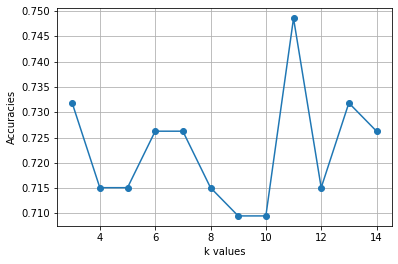

In [35]:
# Plotting Accuracies and k_values
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [36]:
# When n=11
classifier=KNeighborsClassifier(n_neighbors=11)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

In [37]:
# Score of kNN Classification model
score_kNN=kNN_model.score(X_test,y_test)
score_kNN

0.7486033519553073

# Creating SVM Model (SVC-Support Vector Classifier)..Linear Kernel

In [38]:
# Importing SVC
from sklearn.svm import SVC

In [39]:
svm_linear_model=SVC(kernel='linear').fit(X_train,y_train)
y_pred_svm=svm_linear_model.predict(X_test)

In [40]:
# Score of SVM (kernel='linear') model
score_svm_lin=svm_linear_model.score(X_test,y_test)
score_svm_lin

0.7821229050279329

#  Creating SVM Model .....RBF (Radial Basis Function Kernel)

In [41]:
svm_rbf_model=SVC(kernel='rbf').fit(X_train,y_train)
y_pred_svm1=svm_rbf_model.predict(X_test)

In [42]:
# Score of SVM (kernel='rbf') model
score_svm_rbf=svm_rbf_model.score(X_test,y_test)
score_svm_rbf

0.659217877094972

# 4. Do k-fold and stratified k-fold cross validation techniques and find the average accuracy score of the models

# k-fold cross validation for kNN classification model

In [43]:
# Importing k-Fold cross validation
from sklearn.model_selection import KFold

In [44]:
k_fold_validator=KFold(10)

In [45]:
# Checking the training and testing indices in each iteration
for train_index,test_index in k_fold_validator.split(X,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [46]:
# Importing Cross Validation Score
from sklearn.model_selection import cross_val_score

In [47]:
# k-fold Cross Validation Score of kNN Model
cv_result=cross_val_score(kNN_model,X,y,cv=k_fold_validator)

In [48]:
cv_result

array([0.61111111, 0.66292135, 0.6741573 , 0.70786517, 0.66292135,
       0.76404494, 0.71910112, 0.74157303, 0.76404494, 0.76404494])

In [49]:
# Average accuracy score of k-fold cross validation for kNN classification model
np.mean(cv_result)

0.7071785268414482

# Stratified k-fold cross validation for kNN classification model 

In [50]:
# Importing Stratified k-Fold cross validation
from sklearn.model_selection  import StratifiedKFold

In [51]:
skfold_validator=StratifiedKFold(n_splits=10)

In [52]:
# Checking the training and testing indices in each iteration
for train_index,test_index in skfold_validator.split(X,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [53]:
# Stratified k-fold Cross Validation Score of kNN Model
skcv_result=cross_val_score(kNN_model,X,y,cv=skfold_validator)

In [54]:
skcv_result

array([0.62222222, 0.62921348, 0.61797753, 0.74157303, 0.6741573 ,
       0.70786517, 0.74157303, 0.75280899, 0.73033708, 0.75280899])

In [55]:
# Average accuracy score of Stratified k-fold cross validation for kNN classification model
np.mean(skcv_result)

0.6970536828963796

# k-fold cross validation for SVM (kernel='linear') classification model

In [56]:
k_fold_validator1=KFold(10)

In [57]:
# Checking the training and testing indices in each iteration
for train_index,test_index in k_fold_validator1.split(X,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [58]:
# k-fold Cross Validation Score of SVM (kernel='linear') Model
cv_result1=cross_val_score(svm_linear_model,X,y,cv=k_fold_validator1)

In [59]:
cv_result1

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [60]:
# Average accuracy score of k-fold cross validation for SVM (kernel='linear') classification model
np.mean(cv_result1)

0.786729088639201

# Stratified k-fold cross validation for SVM (kernel='linear') classification model 

In [61]:
skfold_validator1=StratifiedKFold(n_splits=10)

In [62]:
# Checking the training and testing indices in each iteration
for train_index,test_index in skfold_validator1.split(X,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [63]:
# Stratified k-fold Cross Validation Score of SVM (kernel='linear') Model
skcv_result1=cross_val_score(svm_linear_model,X,y,cv=skfold_validator1)

In [64]:
skcv_result1

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [65]:
# Average accuracy score of Stratified k-fold cross validation for SVM(kernel='linear') classification model
np.mean(skcv_result1)

0.786729088639201

#  k-fold cross validation for SVM (kernel='rbf') classification model

In [66]:
k_fold_validator2=KFold(10)

In [67]:
# Checking the training and testing indices in each iteration
for train_index,test_index in k_fold_validator2.split(X,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [68]:
# k-fold Cross Validation Score of SVM (kernel='rbf') Model
cv_result2=cross_val_score(svm_rbf_model,X,y,cv=k_fold_validator2)

In [69]:
cv_result2

array([0.6       , 0.6741573 , 0.66292135, 0.6741573 , 0.65168539,
       0.69662921, 0.65168539, 0.73033708, 0.73033708, 0.69662921])

In [70]:
# Average accuracy score of k-fold cross validation for SVM (kernel='rbf') classification model
np.mean(cv_result2)

0.6768539325842697

# Stratified k-fold cross validation for SVM (kernel='rbf') classification model 

In [71]:
skfold_validator2=StratifiedKFold(n_splits=10)

In [72]:
# Checking the training and testing indices in each iteration
for train_index,test_index in skfold_validator2.split(X,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [73]:
# Stratified k-fold Cross Validation Score of SVM (kernel='rbf') Model
skcv_result2=cross_val_score(svm_rbf_model,X,y,cv=skfold_validator2)

In [74]:
skcv_result2

array([0.62222222, 0.58426966, 0.68539326, 0.74157303, 0.68539326,
       0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ])

In [75]:
# Average accuracy score of Stratified k-fold cross validation for SVM (kernel='rbf') classification model
np.mean(skcv_result2)

0.6801997503121099